In [ ]:
from quantum.utils import (
    convert_to_PCS_circ,
    convert_to_ancilla_free_PCS_circ,
    check_to_ancilla_free_circ,
)

from quantum.pauli_checks import (
    ChecksFinder,
    add_pauli_checks,
    add_meas_pauli_checks,
    add_linear_meas_pauli_checks,
    search_for_pauli_list,
)
from quantum.pauli_checks import (
    gen_initial_layout,
    gen_final_layout,
    complete_postprocess,
    filter_results,
)

In [3]:
import qiskit
import qiskit_aer
from qiskit.quantum_info import hellinger_fidelity
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit import QuantumCircuit

from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import itertools

In [4]:
num_qubits = 3

circ = qiskit.QuantumCircuit(3)
circ.ccx(0, 1, 2)

# circ.measure_active()


circ.draw(fold=-1)

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

### Transpile to basis set that pauli checks can work with

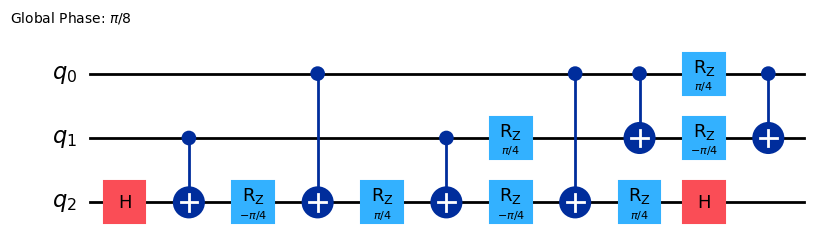

In [ ]:
from qiskit import transpile

# basis_gates = ["x","sx","rz","cx","rx"]
basis_gates = ["x", "y", "rz", "s", "h", "cx"]
transpiled_circ = transpile(
    circ, basis_gates=basis_gates, optimization_level=1, seed_transpiler=0
)  # transpile circuit into insturctions that PCS can use to "push" check through
# transpiled_circ = transpile(circ, basis_gates=basis_gates, optimization_level=1, seed_transpiler=0)
circ = transpiled_circ.copy()
circ.draw("mpl")

### Generate PCS circ with desired number of check layers

In [9]:
num_checks = 2

sign_list, pcs_circ = convert_to_PCS_circ(circ, num_qubits, num_checks, barriers=True)

Found check 1: +1IIZ, +1IIZ
Found check 2: +1IZI, +1IZI
Required number of checks found.
p1_list =  [['+1IIZ', '+1IIZ'], ['+1IZI', '+1IZI']]


['+1', '+1']


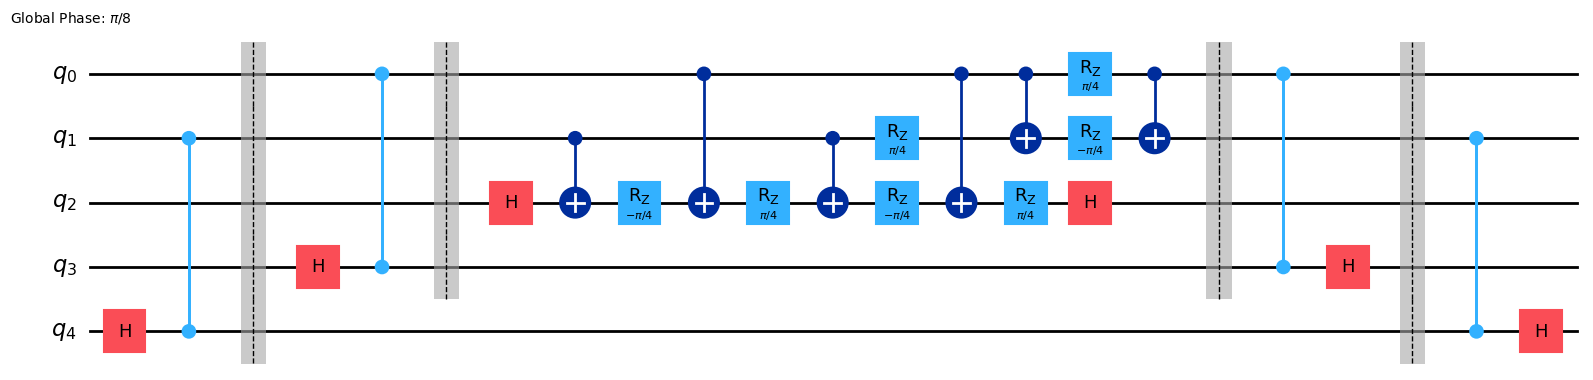

In [10]:
print(sign_list)
pcs_circ.draw("mpl")